# Chapter 11: Deep Learning in Image Processing - Object Detection, and more


## Excercise 3: Object Detecion With YoLo3

In [ ]:
# Importing necessary libraries
import numpy as np
import cv2
import matplotlib.pyplot as plt
import time
weights_path = '../input/yolo-coco-data/yolov3.weights'
configuration_path = '../input/yolo-coco-data/yolov3.cfg'

probability_minimum = 0.5

threshold = 0.3
labels = open('../input/yolo-coco-data/coco.names').read().strip().split('\n')
network = cv2.dnn.readNetFromDarknet(configuration_path, weights_path)


layers_names_all = network.getLayerNames() 
layers_names_output = [layers_names_all[i[0] - 1] for i in network.getUnconnectedOutLayers()] 

image_input = cv2.imread('../input/images-for-testing/cat2.jpg')

image_input_shape = image_input.shape


plt.rcParams['figure.figsize'] = (10.0, 10.0)
plt.imshow(cv2.cvtColor(image_input, cv2.COLOR_BGR2RGB))
plt.show()

plt.rcParams['figure.figsize'] = (10.0, 10.0)
plt.imshow(cv2.cvtColor(image_input, cv2.COLOR_BGR2RGB))
plt.show()

blob = cv2.dnn.blobFromImage(image_input, 1 / 255.0, (416, 416), swapRB=True, crop=False)
blob_to_show = blob[0, :, :, :].transpose(1, 2, 0)
plt.rcParams['figure.figsize'] = (5.0, 5.0)
plt.imshow(blob_to_show)
plt.show()

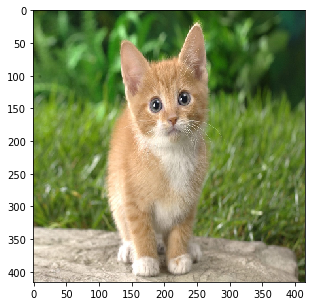

In [ ]:

network.setInput(blob)  
start = time.time()
output_from_network = network.forward(layers_names_output)
end = time.time()

print('YOLO v3 took {:.5f} seconds'.format(end - start))


YOLO v3 took 0.99887 seconds


In [ ]:
# Check point
print(type(output_from_network))  
print(type(output_from_network[0]))

<class 'list'>
<class 'numpy.ndarray'>


In [ ]:

np.random.seed(42)

colours = np.random.randint(0, 255, size=(len(labels), 3), dtype='uint8')


print(colours.shape)  
print(colours[0]) 

(80, 3)
[102 220 225]


In [ ]:

bounding_boxes = []
confidences = []
class_numbers = []

In [ ]:

h, w = image_input_shape[:2] 
print(h, w)  # 917 1222

917 1222


In [ ]:
for result in output_from_network:
    for detection in result:
        scores = detection[5:]
        class_current = np.argmax(scores)
        confidence_current = scores[class_current]
        if confidence_current > probability_minimum:
            box_current = detection[0:4] * np.array([w, h, w, h])
            x_center, y_center, box_width, box_height = box_current.astype('int')
            x_min = int(x_center - (box_width / 2))
            y_min = int(y_center - (box_height / 2))

            bounding_boxes.append([x_min, y_min, int(box_width), int(box_height)])
            confidences.append(float(confidence_current))
            class_numbers.append(class_current)

In [ ]:

results = cv2.dnn.NMSBoxes(bounding_boxes, confidences, probability_minimum, threshold)
for i in range(len(class_numbers)):
    print(labels[int(class_numbers[i])])
with open('found_labels.txt', 'w') as f:
    for i in range(len(class_numbers)):
        f.write(labels[int(class_numbers[i])])


cat


In [ ]:

if len(results) > 0:
    for i in results.flatten():
  
        x_min, y_min = bounding_boxes[i][0], bounding_boxes[i][1]
        box_width, box_height = bounding_boxes[i][2], bounding_boxes[i][3]

     
        colour_box_current = [int(j) for j in colours[class_numbers[i]]]

        cv2.rectangle(image_input, (x_min, y_min), (x_min + box_width, y_min + box_height),
                      colour_box_current, 5)
        text_box_current = '{}: {:.4f}'.format(labels[int(class_numbers[i])], confidences[i])

        cv2.putText(image_input, text_box_current, (x_min, y_min - 7), cv2.FONT_HERSHEY_SIMPLEX,
                    1.5, colour_box_current, 5)

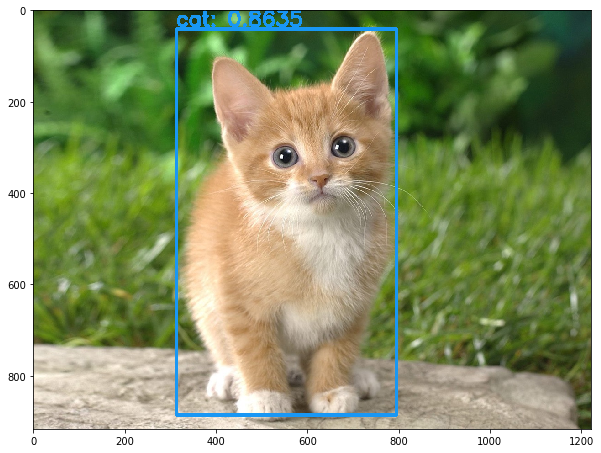

In [ ]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 10.0)
plt.imshow(cv2.cvtColor(image_input, cv2.COLOR_BGR2RGB))
plt.show()
